# 그레인저 인과관계 검정(Granger Causality Test)을 통한 시가총액 상위 10개의 암호화폐 간의 분단위 인과관계 분석
- 각 암호화폐와 다른 여러 암호화폐간의 최대 100분의 시차를 둠으로써, 특정 암호화폐가 최대 100분의 시간동안 타 암호화폐에 어느정도 영향력을 행사하는지 그레인저 인과관계 검정을 하고 Z score로 이를 확인. Z score가 유의수준 0.05 이하일 경우 영향력을 행사한다고 보고, 0.01 이하일 경우 강력한 영향력을 보인다고 판단

In [1]:
# 필요한 라이브러리 설치
# !pip install ccxt
# 예시 데이터로 사용할 비트코인 데이터를 가져오기 위해 바이낸스 api 사용

import ccxt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

binance = ccxt.binance()

# 암호화폐 집함의 데이터프레임을 생성하는 함수
'''
crypto_list:암호화폐의 티커로 이뤄진 리스트
feature: OHLCV중 선택. 여기서는 종가(close) 사용
timeframe: 데이터 간격 설정. 여기서는 분단위이므로 '1m'로 설정
limit: 불러올 데이터 크기. 여기서는 1000개를 불러옴
'''
def cryptoSet(crypto_list, feature, timeframe, limit):
    crypto_df = pd.DataFrame()
    
    for crypto in crypto_list:
        ohlcv = binance.fetch_ohlcv(f"{crypto}/USDT", timeframe=timeframe, limit=limit)
        df = pd.DataFrame(ohlcv, columns=['datetime', 'open', 'high', 'low', 'close', 'volume'])
        df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
        df.set_index('datetime', inplace=True)
        df = pd.DataFrame(df[f'{feature}'])
        df.rename(columns={f'{feature}':f'{crypto}'}, inplace=True)
        
        crypto_df = pd.concat([crypto_df, df], axis=1)
        
    return crypto_df

# 시가총액 상위 10개의 암호화폐로 이뤄진 리스트
crypto_list = ['BTC', 'ETH', 'BNB', 'USDC', 'XRP', 'ADA', 'DOGE', 'SOL', 'MATIC', 'TRX']

crypto_set = cryptoSet(crypto_list, 'close', '1m', 1000)
crypto_set

,BTC,ETH,BNB,USDC,XRP,ADA,DOGE,SOL,MATIC,TRX
datetime,,,,,,,,,,
2023-06-06 11:34:00,25688.89,1815.26,278.6,0.9997,0.5080,0.3531,0.06677,19.89,0.8233,0.07847
2023-06-06 11:35:00,25688.01,1815.22,278.6,0.9997,0.5084,0.3532,0.06676,19.88,0.8234,0.07848
2023-06-06 11:36:00,25687.22,1815.01,278.5,0.9997,0.5083,0.3532,0.06676,19.88,0.8235,0.07847
2023-06-06 11:37:00,25682.45,1814.44,278.5,0.9997,0.5082,0.3531,0.06674,19.84,0.8224,0.07843
2023-06-06 11:38:00,25670.00,1814.00,278.4,0.9997,0.5081,0.3531,0.06674,19.84,0.8220,0.07845
...,...,...,...,...,...,...,...,...,...,...
2023-06-07 04:09:00,26924.90,1878.11,279.1,0.9998,0.5290,0.3444,0.06956,20.16,0.8080,0.07869
2023-06-07 04:10:00,26910.40,1877.86,279.1,0.9999,0.5286,0.3444,0.06955,20.14,0.8072,0.07867
2023-06-07 04:11:00,26906.37,1878.15,279.1,0.9998,0.5289,0.3443,0.06955,20.15,0.8069,0.07867


Granger Causality Test Results for 'BTC' ('BTC'가 다른 지표들의 원인이 되는 경우):
- 'ETH': [0.0856, 0.1419, 0.129, 0.1417, 0.2267, 0.2388, 0.2026, 0.1089, 0.1589, 0.1179, 0.0561, 0.0547, 0.0777, 0.0773, 0.0814, 0.1323, 0.1913, 0.2059, 0.2608, 0.3051, 0.3531, 0.4298, 0.421, 0.4591, 0.6017, 0.6468, 0.6973, 0.7363, 0.7632, 0.8015, 0.733, 0.7053, 0.609, 0.6581, 0.6743, 0.6837, 0.6159, 0.6051, 0.5821, 0.6108, 0.6536, 0.6622, 0.6773, 0.6435, 0.5654, 0.5964, 0.6582, 0.52, 0.6034, 0.6114, 0.6468, 0.6843, 0.7171, 0.752, 0.7822, 0.8289, 0.7814, 0.7872, 0.8053, 0.8186, 0.76, 0.7414, 0.7733, 0.7316, 0.7326, 0.7504, 0.7453, 0.7676, 0.5818, 0.5849, 0.5469, 0.553, 0.5898, 0.6371, 0.6946, 0.7182, 0.6988, 0.7049, 0.7176, 0.7315, 0.735, 0.7733, 0.7577, 0.6932, 0.678, 0.6396, 0.6589, 0.6905, 0.6941, 0.681, 0.6708, 0.6737, 0.6996, 0.6373, 0.5438, 0.5635, 0.5319, 0.5782, 0.4335, 0.4535]
- 'BNB': [0.5997, 0.8792, 0.9635, 0.5688, 0.3183, 0.199, 0.065, 0.0762, 0.1055, 0.1396, 0.1219, 0.159, 0.2029, 0.2092, 0.1459, 0.2112,

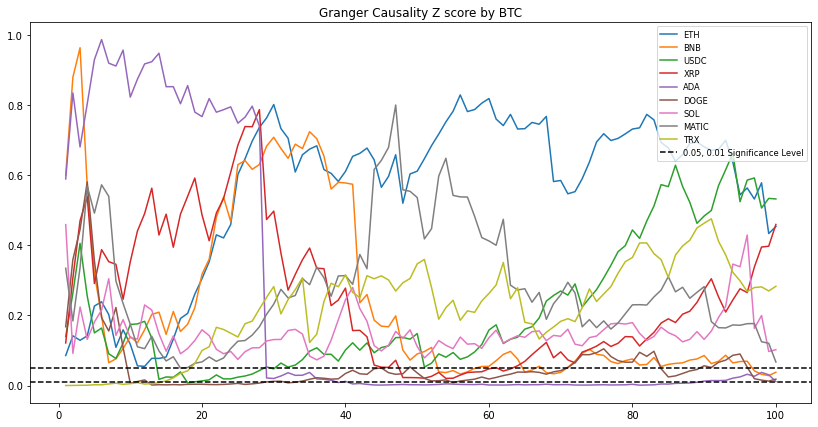

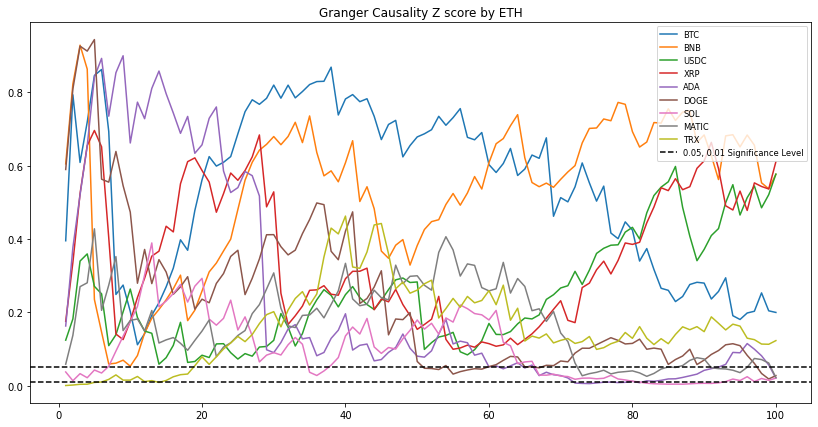

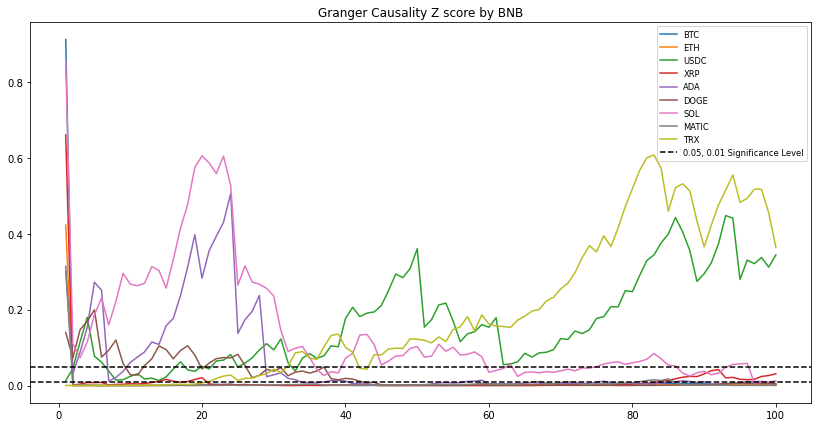

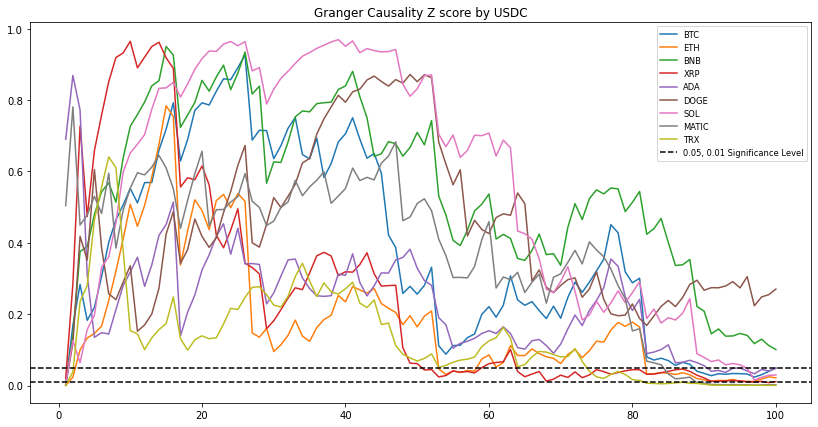

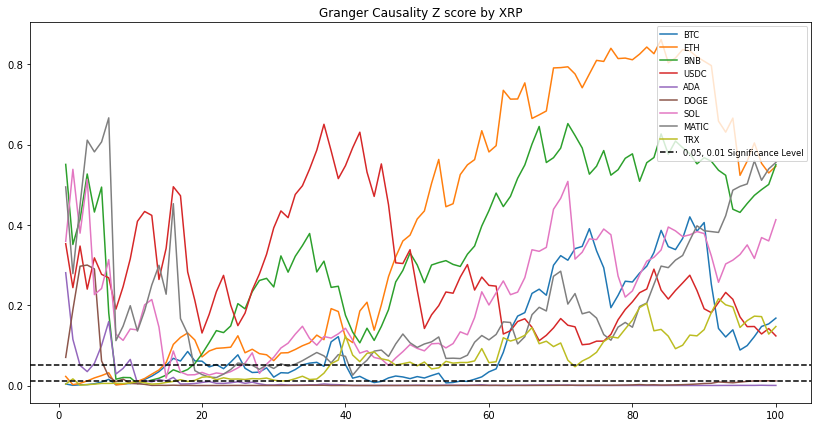

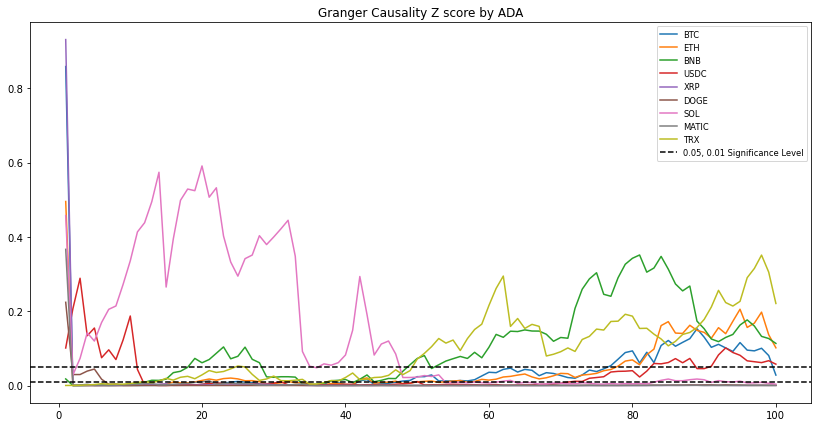

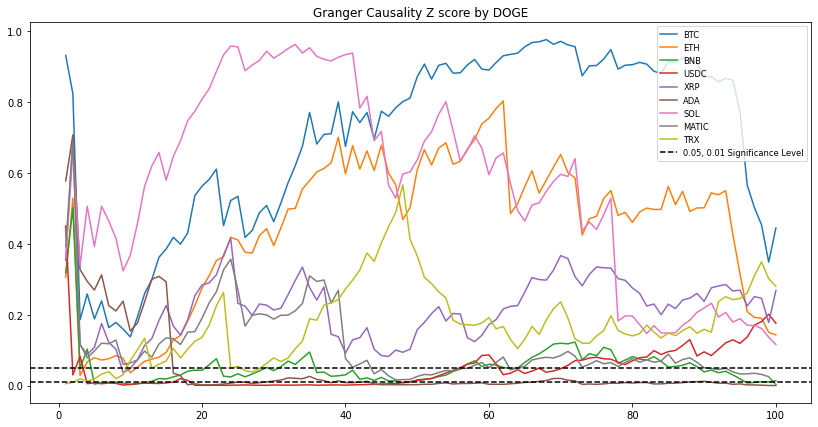

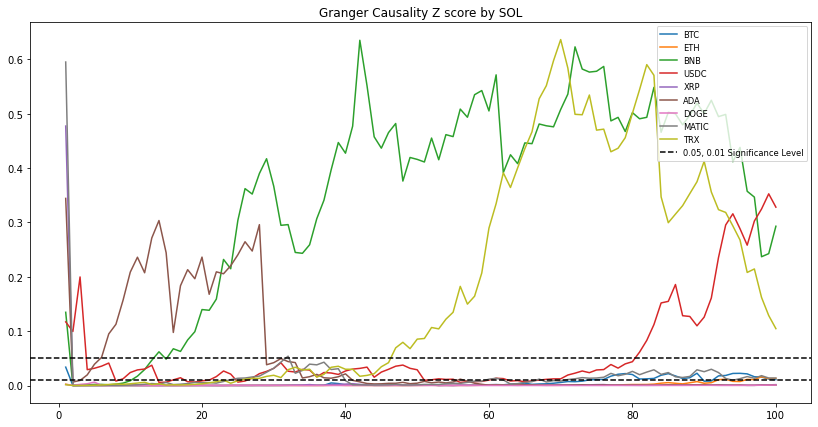

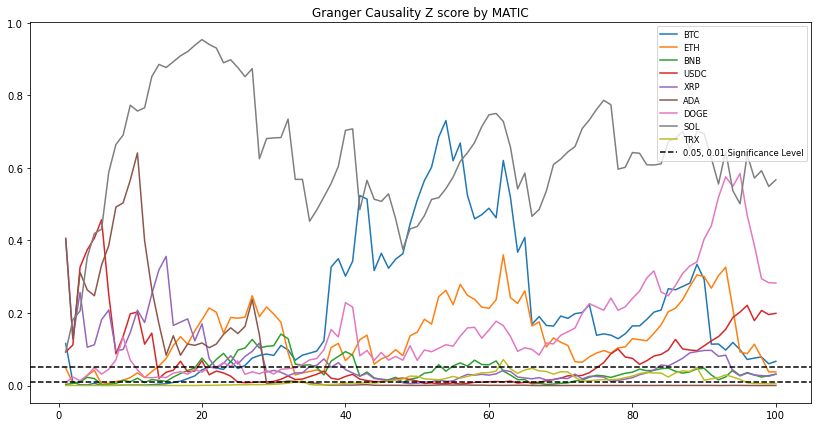

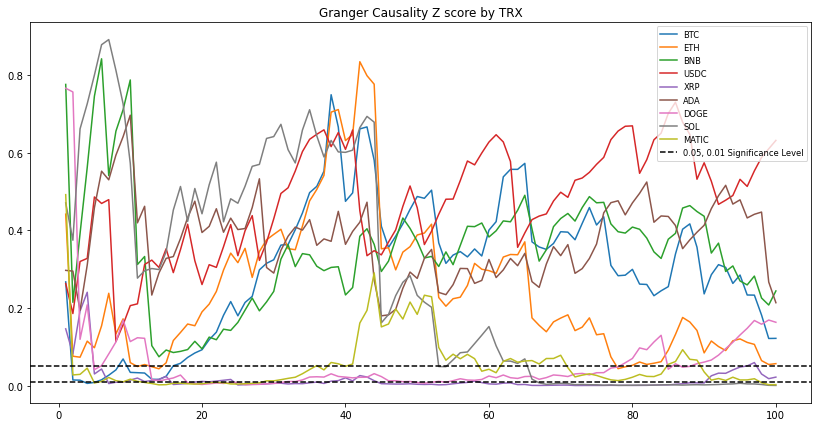

In [2]:
# Granger 인과성 검정 함수 정의
def granger_causality_test(data, maxlag):
    results = {}
    columns = data.columns
    for column in columns:
        results[column] = {}
        for target_column in columns:
            if column != target_column:
                granger_test = grangercausalitytests(data[[column, target_column]], maxlag=maxlag, verbose=False)
                p_values = [round(granger_test[i+1][0]['ssr_ftest'][1], 4) for i in range(maxlag)]
                results[column][target_column] = p_values
    return results

# Granger 인과성 검정 수행
max_lag = 100  # 최대 시차(lag) 설정
granger_results = granger_causality_test(crypto_set, max_lag)

# 결과 출력
for column, result in granger_results.items():
    result_df = pd.DataFrame()
    
    # Z score 확인
    print(f"Granger Causality Test Results for '{column}' ('{column}'가 다른 지표들의 원인이 되는 경우):")
    for target_column, p_values in result.items():
        print(f"- '{target_column}': {p_values}")

        result_df = pd.concat([result_df, pd.DataFrame(p_values, columns=[f'{target_column}'])], axis=1)
        
    result_df.index = range(1, max_lag + 1)
    
    # 그래프 그리기
    plt.figure(figsize=(14,7))
    plt.title(f'Granger Causality Z score by {column}')
    
    for column in result_df.columns:
        plt.plot(result_df.index, result_df[column], label=column)
    
    plt.axhline(0.05, color='black', linestyle='--', label='0.05, 0.01 Significance Level')
    plt.axhline(0.01, color='black', linestyle='--')

    plt.legend(loc='upper right', fontsize='small')